<a href="https://colab.research.google.com/github/Danielesc1003/Statistic/blob/main/Trabajo_final_Estadistica_DESC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Proyecto Final Estadística: Regresión multilineal de la base de datos de carros**
**Estudiante:** Daniel Esteban Salazar Camacho

**Docente:** Irina Artamonova

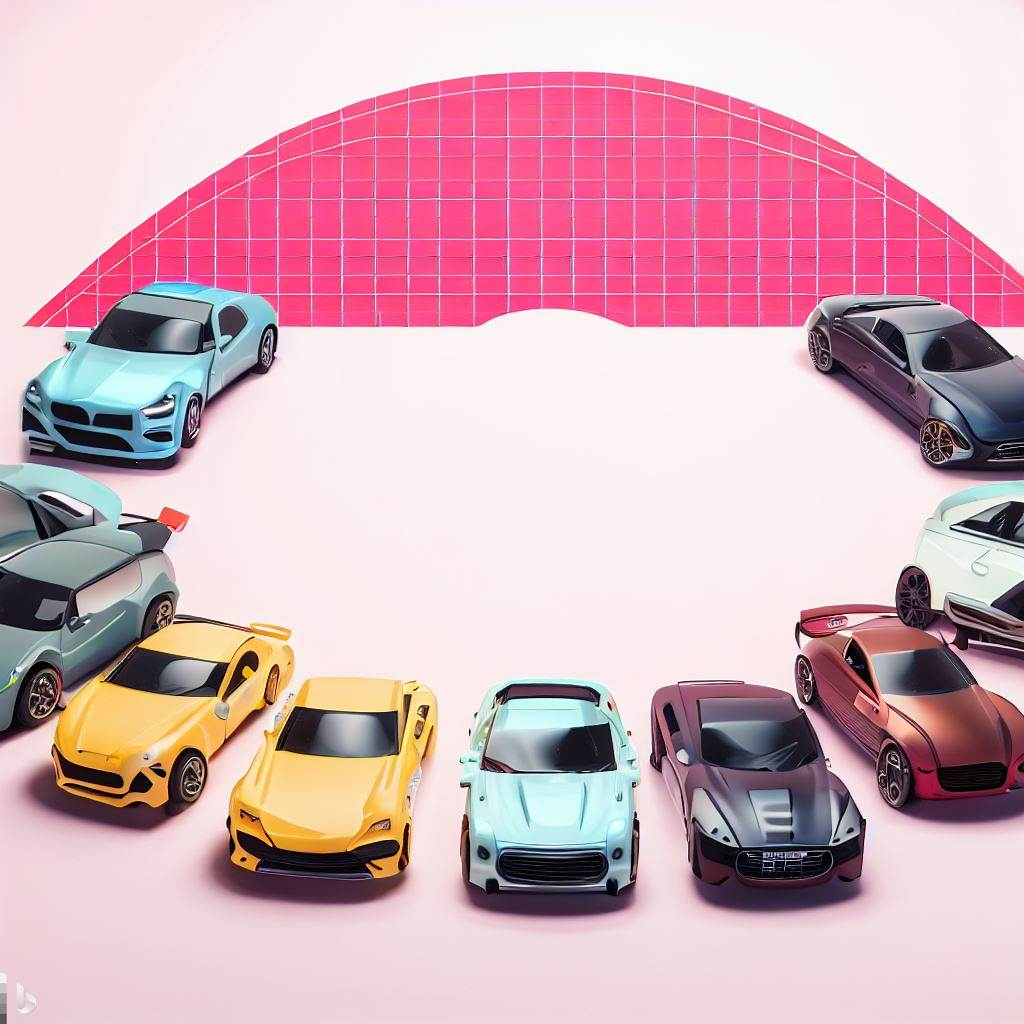

En este proyecto se muestra una regresión multilineal para explicar la variable aceleración de una base de datos de automóviles.

## **Código**

In [549]:
#Librerías
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm #Esta librería es la que permite desarrollar el modelo multilineal

In [550]:
#Imporatando la base de datos
cars_df = pd.read_csv('Cars.csv', delimiter = ',')
cars_df.drop('Unnamed: 0', inplace = True, axis = 1)
cars_df

,Miles por galon,Motor,Fuerza(HP),Peso(kg),acelaracion,Modelo(año),Pais,Numero de motores
0,18.0,307,130.0,3504,12,70,1.0,8.0
1,15.0,350,165.0,3693,12,70,1.0,8.0
2,18.0,318,150.0,3436,11,70,1.0,8.0
3,16.0,304,150.0,3433,12,70,1.0,8.0
4,17.0,302,140.0,3449,11,70,1.0,8.0
...,...,...,...,...,...,...,...,...
401,27.0,140,86.0,2790,16,82,1.0,4.0
402,44.0,97,52.0,2130,25,82,2.0,4.0
403,32.0,135,84.0,2295,12,82,1.0,4.0
404,28.0,120,79.0,2625,19,82,1.0,4.0


In [551]:
#Información de las variables
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Miles por galon    398 non-null    float64
 1   Motor              406 non-null    int64  
 2   Fuerza(HP)         400 non-null    float64
 3   Peso(kg)           406 non-null    int64  
 4   acelaracion        406 non-null    int64  
 5   Modelo(año)        406 non-null    int64  
 6   Pais               405 non-null    float64
 7   Numero de motores  405 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.5 KB


Es posible observar que todas las variables en la base de datos son numéricas, ya sean flotantes o enteras. Se tienen 8 columnas y 406 filas.

##**Distribución de los datos**

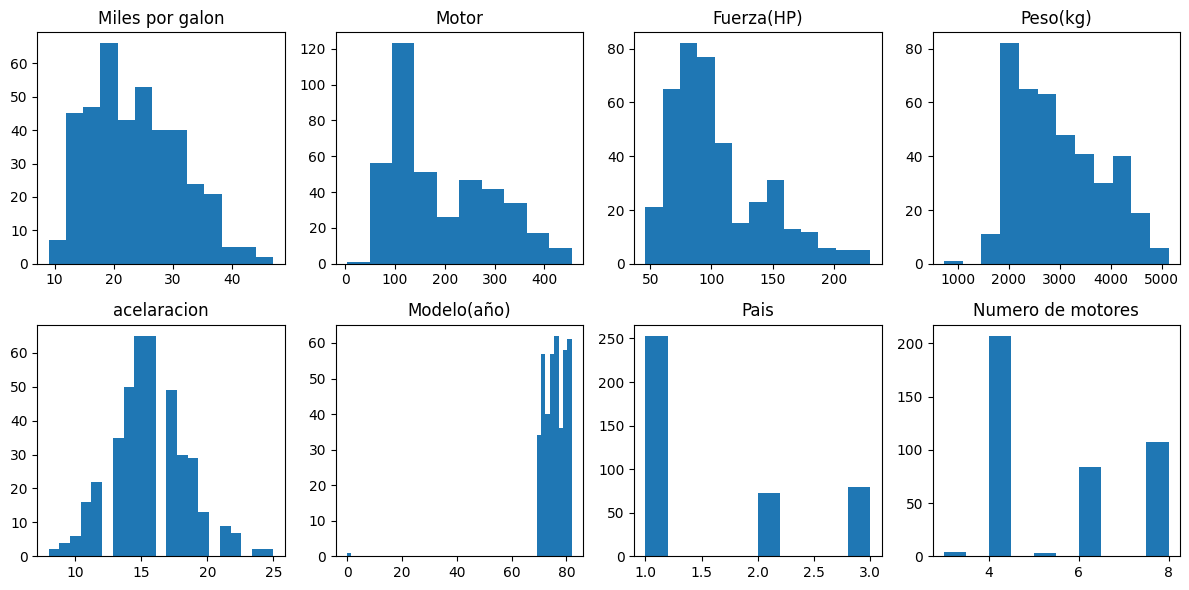

In [552]:
# Número de columnas
num_columns = cars_df.shape[1]

# Tamaño del grid
num_rows = 2
num_cols = 4

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6))

for i, column in enumerate(cars_df.columns):

    row = i // num_cols
    col = i % num_cols

    axes[row, col].hist(cars_df[column], bins='auto')
    axes[row, col].set_title(column)

plt.tight_layout()

plt.show()

En el gráfico anterior se pueden observar las distribuciones de los datos para cada variable. 

En primer lugar, se hará el modelo con las variable originales. Se tratará de mejorar y lograr un valor de precisión considerablemente bueno. Después, se hará una limpieza a los datos y se transformarán algunas variables para desarrollar un mejor modelo. 

##**Construcción del modelo para la variable aceleración**

Para crear el modelo es necesario separar el DataFrame en las columnas independientes y la columna dependiente. En este caso ***X*** será un DataFrame con las variables independiente y ***y*** un DataFrame con una sola columna, aceleración.

In [553]:
missing_values_count = cars_df.isnull().sum()
print(missing_values_count)

Miles por galon      8
Motor                0
Fuerza(HP)           6
Peso(kg)             0
acelaracion          0
Modelo(año)          0
Pais                 1
Numero de motores    1
dtype: int64


La línea de código anterior muestra las cantidad de filas vacías por columna. Por ejemplo la columna ***Miles por galon*** tiene 8 filas vacías. Para remediar este problema se pueden utilizar dos alternativas: Eliminar las filas ó rellenarlas con algún valor. En este caso se usará la segunda opción y dichos valores faltantes los rellenaremoscon la media de cada columna en el DataFrame ***cars_df***. La función de la librería *Pandas*, **fillna()** permite realizar este procedimiento.

In [554]:
cars_df_fill = cars_df.fillna(cars_df.mean())  # Imputar valores faltantes con la media de la columna

In [555]:
X = cars_df_fill[['Miles por galon', 'Motor', 'Fuerza(HP)', 'Peso(kg)', 'Modelo(año)', 'Pais', 'Numero de motores']]
y = cars_df_fill['acelaracion']

In [556]:
X = sm.add_constant(X)
X

,const,Miles por galon,Motor,Fuerza(HP),Peso(kg),Modelo(año),Pais,Numero de motores
0,1.0,18.0,307,130.0,3504,70,1.0,8.0
1,1.0,15.0,350,165.0,3693,70,1.0,8.0
2,1.0,18.0,318,150.0,3436,70,1.0,8.0
3,1.0,16.0,304,150.0,3433,70,1.0,8.0
4,1.0,17.0,302,140.0,3449,70,1.0,8.0
...,...,...,...,...,...,...,...,...
401,1.0,27.0,140,86.0,2790,82,1.0,4.0
402,1.0,44.0,97,52.0,2130,82,2.0,4.0
403,1.0,32.0,135,84.0,2295,82,1.0,4.0
404,1.0,28.0,120,79.0,2625,82,1.0,4.0


En la línea de código anterior se usó la función ***add_constant()*** de **statsmodels.api** de agregar constantes a cada dato de las variables independientes para que el cálculo de **$R^2$** sea centrado.

Luego, con la función ***OLS()*** se realiza el modelo, es decir la regresión multilineal. OLS es Ordinary Least Squares. 

In [557]:
model = sm.OLS(y, X)
results = model.fit()

##**Resultados**

In [558]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            acelaracion   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     93.18
Date:                Mon, 22 May 2023   Prob (F-statistic):           7.22e-80
Time:                        06:35:39   Log-Likelihood:                -799.62
No. Observations:                 406   AIC:                             1615.
Df Residuals:                     398   BIC:                             1647.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                19.0168      1.59

##**Primeras conclusiones**

1. El valor de *$R^2$* es $0.621$, lo que indica que el modelo de regresión explica aproximadamente el $62.1\%$ de la variabilidad en la variable dependiente "aceleración". Esto significa que las variables independientes incluidas en el modelo tienen cierta capacidad para predecir la variable dependiente.

2. El estadístico *$F$* tiene un valor de $93.18$ y el valor-$p$ asociado es muy pequeño $(7.22\times 10^{-80})$, lo que indica que hay evidencia significativa de que al menos una de las variables independientes tiene un efecto significativo en la variable dependiente. En otras palabras, el modelo de regresión en su conjunto es estadísticamente significativo. Claro, considerando un $\alpha=0.05$.

3. Para cada variable independiente, se proporciona el coeficiente estimado, el error estándar, el estadístico $t$ y el valor-$p$ asociado. El valor-$p$ indica la probabilidad de que el coeficiente estimado sea igual a cero. Si el valor p es menor que un umbral de significancia (por ejemplo, $\alpha=0.05$), se considera que la variable independiente tiene un efecto significativo en la variable dependiente. En este caso, las variables **Fuerza(HP)**, **Peso(kg)** y **Número de motores** tienen valores-$p$ muy pequeños (menores que $0.05$), lo que sugiere que tienen un efecto significativo en la variable dependiente **aceleración**.

4. El coeficiente para la constante (intercepto) es 19.0168. Esto indica el valor esperado de la variable dependiente ***acelaración*** cuando todas las variables independientes son iguales a cero.

##**Razones a tener en cuenta para mejorar el modelo (continuación)**

* La variable **Miles por galón** tiene un valor-$p$ alto $(0.617)$, lo que sugiere que no tiene un efecto significativo en la variable dependiente **acelaración** en este modelo.

* Las variables **Modelo(año)** y **País** también tienen valores-$p$ altos $(0.755$ y $0.897$ respectivamente$)$, lo que indica que no tienen un efecto significativo en la variable dependiente en este modelo.

* Como se observa en las notas brindadas por el resumen del modelo, el modelo puede estar sufriendo de multicolinealidad o problemas numéricos. Esto significa que algunas variables independientes pueden estar correlacionadas entre sí o puede haber problemas numéricos en la estimación del modelo.

##**Mejorando el modelo**

Con las conclusiones anteriores, se hará un nuevo modelo eliminando las columnas que no están relacionadas directamente con la variable dependiente (aceleración). 

In [559]:
#La función drop() elimina las columnas mencionadas
cars_df_reduced = cars_df_fill.drop(["Miles por galon", "Pais", "Modelo(año)"], axis=1)
cars_df_reduced.head() #Muestra las primeras 5 filas

,Motor,Fuerza(HP),Peso(kg),acelaracion,Numero de motores
0,307,130.0,3504,12,8.0
1,350,165.0,3693,12,8.0
2,318,150.0,3436,11,8.0
3,304,150.0,3433,12,8.0
4,302,140.0,3449,11,8.0


In [560]:
#Separación de la variable dependiente de las intependientes
X_reduced = cars_df_reduced.drop("acelaracion", axis=1)
y_reduced = cars_df_reduced["acelaracion"]
X_reduced.head()

,Motor,Fuerza(HP),Peso(kg),Numero de motores
0,307,130.0,3504,8.0
1,350,165.0,3693,8.0
2,318,150.0,3436,8.0
3,304,150.0,3433,8.0
4,302,140.0,3449,8.0


In [561]:
X_reduced = sm.add_constant(X_reduced)  # Agregar constante 
model_reduced = sm.OLS(y_reduced, X_reduced)
results_reduced = model_reduced.fit()
X_reduced

,const,Motor,Fuerza(HP),Peso(kg),Numero de motores
0,1.0,307,130.0,3504,8.0
1,1.0,350,165.0,3693,8.0
2,1.0,318,150.0,3436,8.0
3,1.0,304,150.0,3433,8.0
4,1.0,302,140.0,3449,8.0
...,...,...,...,...,...
401,1.0,140,86.0,2790,4.0
402,1.0,97,52.0,2130,4.0
403,1.0,135,84.0,2295,4.0
404,1.0,120,79.0,2625,4.0


##**Resultados**

In [562]:
print(results_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:            acelaracion   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     163.8
Date:                Mon, 22 May 2023   Prob (F-statistic):           5.93e-83
Time:                        06:35:39   Log-Likelihood:                -800.02
No. Observations:                 406   AIC:                             1610.
Df Residuals:                     401   BIC:                             1630.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                17.9434      0.63

##**Conclusiones**

1. El $R^2$ es $0.620$, lo que indica que aproximadamente el $62\%$ de la variabilidad de la variable dependiente "aceleracion" puede ser explicada por las variables independientes restantes en el modelo. Esto sugiere que existe una relación moderada entre las variables independientes y la variable dependiente.

2. Los coeficientes de las variables independientes tienen asociados estadísticos $t$ y valores-$p$. Los valores $t$ indican la significancia de cada variable independiente en el modelo. Si el valor absoluto del estadístico t es grande y el valor-$p$ asociado es pequeño (por debajo del nivel de significancia elegido, $0.05$), entonces se considera que la variable independiente tiene un efecto significativo en la variable dependiente. En este caso, las variables **Fuerza(HP)** y **Peso(kg)** tienen valores-$p$ muy pequeños, lo que sugiere que tienen un efecto significativo en la variable **aceleración**.

3. El estadístico $F$ es $163.8$ y su valor-$p$ asociado es muy pequeño $(5.93\times10^{-83})$. Esto indica que el modelo en su conjunto es significativo y que al menos una de las variables independientes tiene un efecto significativo en la variable dependiente.

##**Comentarios**

El estadístico $t$ para las variables **Motor** y **Número de motores** tiene un valor-$p$ cercano al nivel de significancia $(0.065$ y $0.062$ respectivamente), lo que sugiere que su efecto podría ser marginalmente significativo. Además, el $R^2$ ajustado es ligeramente menor en este modelo reducido en comparación con el modelo anterior, lo que indica que la exclusión de las variables **Miles por galón**, **País** y **Modelo(año)** ha disminuido ligeramente la capacidad del modelo para explicar la variabilidad de la variable dependiente.

##**Ajustando el modelo solo con las variables Fuerza(HP) y Peso(kg)**

A pesar de que las variables **Motor** y **Número de motores** tienen valores muy cercanos al nivel de significancia, se va a realizar un ajuste eliminando estas variables.

In [563]:
# Definir las variables independientes y dependiente
X = X_reduced.drop(["Motor", "Numero de motores"], axis=1)
y_reduced = y_reduced 

# Agregar constante al conjunto de variables independientes
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            acelaracion   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     301.8
Date:                Mon, 22 May 2023   Prob (F-statistic):           7.85e-81
Time:                        06:35:39   Log-Likelihood:                -810.78
No. Observations:                 406   AIC:                             1628.
Df Residuals:                     403   BIC:                             1640.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.7992      0.326     57.684      0.0

##**Conclusiones**

1. El modelo tiene un $R^2$ de $0.600$, lo que indica que aproximadamente el $60\%$ de la variabilidad de la variable dependiente "aceleracion" puede ser explicada por las variables independientes incluidas en el modelo.

2. Los coeficientes estimados indican la relación entre cada variable independiente y la variable dependiente, teniendo en cuenta las otras variables en el modelo. En este caso, para cada unidad de aumento en **Fuerza(HP)**, se espera un decremento de aproximadamente $0.0935$ en la **aceleración**, manteniendo constante el peso. Por otro lado, para cada unidad de aumento en **Peso(kg)**, se espera un incremento de aproximadamente **0.0022** en la **aceleración**, manteniendo constante la fuerza.

3. Tanto la variable **Fuerza(HP)** como la variable **Peso(kg)** tienen valores-$p$ muy bajos (cercanos a cero), lo que sugiere que ambas variables son estadísticamente significativas para predecir la **aceleración**.

4. En este caso, el valor extremadamente bajo del estadístico $F$ $(7.85\times 10^{-81})$ y su valor-$p$ cercano a cero indican que el modelo en su conjunto es altamente significativo para predecir la aceleración.

5. Este modelo muestra una relación significativa entre las variables **Fuerza(HP)** y **Peso(kg)** y la variable **aceleracion**. Ambas variables tienen coeficientes significativos y contribuyen de manera significativa a la predicción de la aceleración. Sin embargo, es importante tener en cuenta que el modelo tiene un $R^2$ relativamente modesto y puede haber otros factores no incluidos en el modelo que también influyen en la aceleración de los vehículos (como las variables eliminadas).

##**Limpieza de datos y transformación de las variables para la búsqueda de un mejor modelo**



Las distribuciones iniciales de cada variable son:

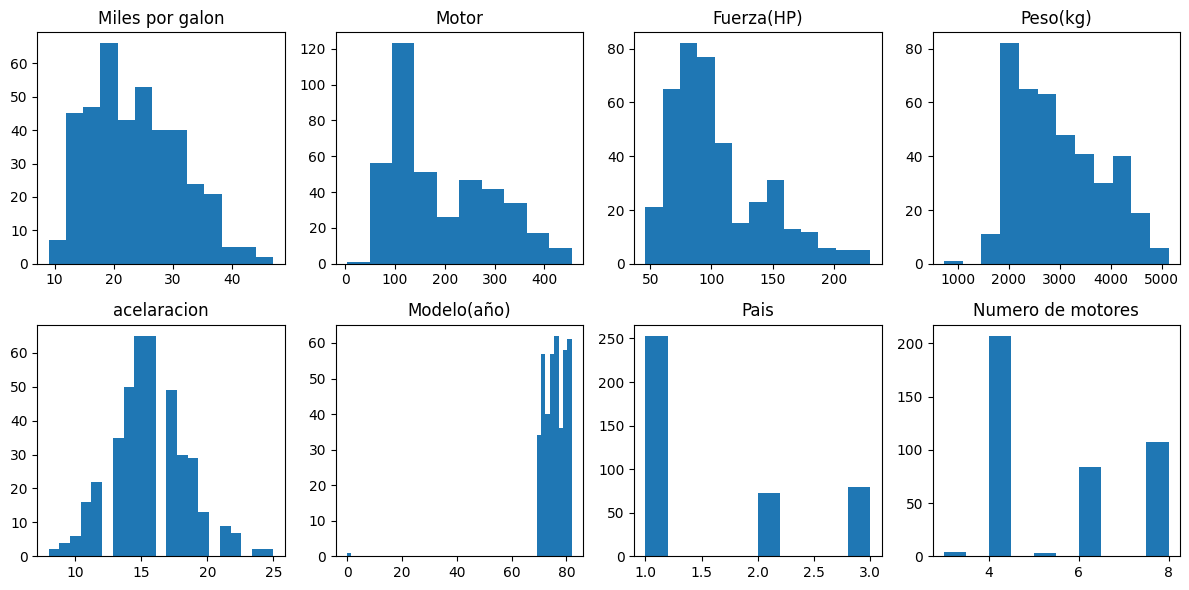

Se puede observar que los cuatro primeros histogramas están sesgados y se podrían normalizar utilizando alguna transformación. Por otro lado, algunas de las variables tienen *outliers* los cuales deberían de ser removidos para mejorar la precisión del modelo.

Primero empecemos por eliminar los valores atípicos de la base de datos.

In [564]:
#Valores únicos y su cantidad para cada columna
unique_values = {}
for column in cars_df.columns:
    unique_values[column] = cars_df[column].value_counts()

for column, values in unique_values.items():
    print(f"Valores únicos en la columna '{column}':")
    print(values)
    print()

Valores únicos en la columna 'Miles por galon':
18.0    28
19.0    22
13.0    20
14.0    19
24.0    19
16.0    19
26.0    18
27.0    17
15.0    17
22.0    16
25.0    16
32.0    16
20.0    16
21.0    15
28.0    14
34.0    12
31.0    12
30.0    12
23.0    12
17.0    11
36.0    10
29.0     9
12.0     6
38.0     6
35.0     6
33.0     6
37.0     5
11.0     4
39.0     3
44.0     2
41.0     2
43.0     2
10.0     2
42.0     1
47.0     1
9.0      1
45.0     1
Name: Miles por galon, dtype: int64

Valores únicos en la columna 'Motor':
97     22
98     19
350    19
318    17
250    17
       ..
83      1
171     1
115     1
101     1
144     1
Name: Motor, Length: 83, dtype: int64

Valores únicos en la columna 'Fuerza(HP)':
150.0    22
90.0     20
110.0    19
88.0     19
100.0    17
         ..
122.0     1
61.0      1
148.0     1
152.0     1
82.0      1
Name: Fuerza(HP), Length: 92, dtype: int64

Valores únicos en la columna 'Peso(kg)':
2130    4
1985    4
2300    3
2720    3
2155    3
       ..
2

In [565]:
#Eliminando outliers para cada columna

columns_to_process = ['Peso(kg)', 'Modelo(año)', 'Numero de motores']

for column in columns_to_process:
    value_counts = cars_df[column].value_counts()
    outliers = value_counts[value_counts == 1].index
    cars_df = cars_df[~cars_df[column].isin(outliers)]

#Valores únicos y su cantidad para cada columna sin outliers
unique_values = {}
for column in cars_df.columns:
    unique_values[column] = cars_df[column].value_counts()

for column, values in unique_values.items():
    print(f"Valores únicos en la columna '{column}':")
    print(values)
    print()

Valores únicos en la columna 'Miles por galon':
32.0    7
27.0    7
26.0    6
25.0    5
30.0    5
28.0    5
36.0    4
33.0    4
31.0    4
18.0    4
34.0    4
22.0    4
19.0    3
37.0    2
41.0    2
38.0    2
15.0    2
29.0    2
13.0    2
14.0    2
21.0    1
43.0    1
16.0    1
17.0    1
20.0    1
47.0    1
23.0    1
24.0    1
44.0    1
Name: Miles por galon, dtype: int64

Valores únicos en la columna 'Motor':
97     12
98      8
91      7
85      4
140     4
90      4
151     3
121     3
122     3
304     2
305     2
86      2
302     2
156     2
120     2
360     2
105     2
400     2
119     2
79      2
112     1
108     1
146     1
350     1
89      1
163     1
390     1
258     1
78      1
231     1
111     1
318     1
250     1
351     1
116     1
232     1
88      1
181     1
Name: Motor, dtype: int64

Valores únicos en la columna 'Fuerza(HP)':
75.0     6
65.0     5
150.0    5
67.0     5
70.0     4
88.0     4
105.0    4
90.0     4
68.0     3
80.0     3
60.0     2
71.0     2
175.0

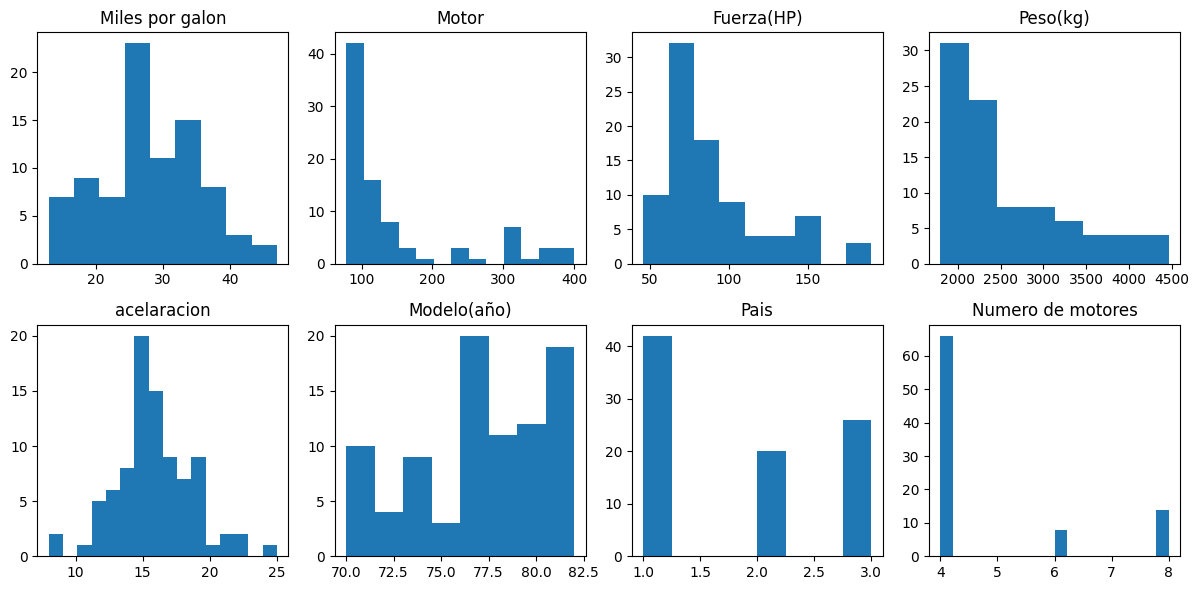

In [566]:
# Número de columnas
num_columns = cars_df.shape[1]

# Tamaño del grid
num_rows = 2
num_cols = 4

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6))

for i, column in enumerate(cars_df.columns):

    row = i // num_cols
    col = i % num_cols

    axes[row, col].hist(cars_df[column], bins='auto')
    axes[row, col].set_title(column)

plt.tight_layout()

plt.show()

Como se puede observar en los histogramas anteriores, los *outliers* ya no están y, aunque algunos histogramas de las variables de las que no se le quitaron outliers, perdieron datos ahora es más fácil realizar una transformación Box-Cox, logaritmica u otra a las variables para intentar normalizarlas. 

In [567]:
cars_df_fill_1 = cars_df.fillna(cars_df.mean())  # Imputar valores faltantes con la media de la columna

In [568]:
from scipy.stats import boxcox, gamma

# Copia el DataFrame original para preservar los datos originales
cars_df_transformed = cars_df_fill_1.copy()

# Aplica la transformación Gamma la columna 'Motor'
a, loc, scale = gamma.fit(cars_df_fill_1['Motor'])
cars_df_transformed['Motor'] = gamma.cdf(cars_df_fill_1['Motor'], a, loc, scale)

# Aplica la transformación Box-Cox a la columna 'Peso(kg)'
cars_df_transformed['Peso(kg)'], _ = boxcox(cars_df_fill_1['Peso(kg)'])

# Aplica la transformación Box-Cox a la columna 'Fuerza(HP)'
cars_df_transformed['Fuerza(HP)'], _ = boxcox(cars_df_fill_1['Fuerza(HP)'])

# Aplica la transformación Box-Cox a la columna 'Modelo(año)'
cars_df_transformed['Modelo(año)'], _ = boxcox(cars_df_fill_1['Modelo(año)'])

# Aplica la transformación Box-Cox a la columna 'aceleracion'
cars_df_transformed['acelaracion'], _ = boxcox(cars_df_fill_1['acelaracion'])

# Muestra el DataFrame con los datos transformados
cars_df_transformed


,Miles por galon,Motor,Fuerza(HP),Peso(kg),acelaracion,Modelo(año),Pais,Numero de motores
9,15.000000,0.984606,1.372696,0.517157,5.782471,2.439813e+08,1.0,8.0
14,27.835294,0.977863,1.370666,0.517157,6.970782,2.439813e+08,1.0,8.0
17,27.835294,0.955041,1.364519,0.517157,5.166244,2.439813e+08,1.0,8.0
24,27.000000,0.326205,1.348132,0.517157,9.211836,2.439813e+08,3.0,4.0
25,26.000000,0.326205,1.313977,0.517157,12.335357,2.439813e+08,2.0,4.0
...,...,...,...,...,...,...,...,...
392,32.000000,0.254121,1.335664,0.517157,9.749668,5.314895e+08,3.0,4.0
394,25.000000,0.793407,1.356683,0.517157,9.749668,5.314895e+08,1.0,6.0
400,27.000000,0.692297,1.349056,0.517157,10.279942,5.314895e+08,1.0,4.0
402,44.000000,0.326205,1.321694,0.517157,14.303476,5.314895e+08,2.0,4.0


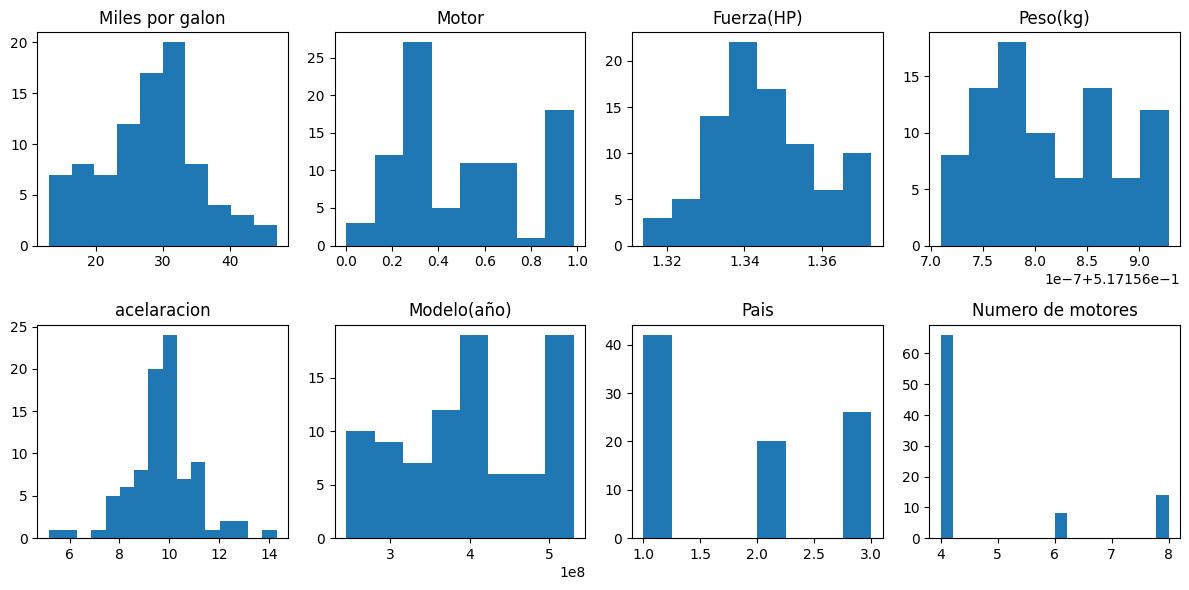

In [569]:
# Número de columnas
num_columns = cars_df_transformed.shape[1]

# Tamaño del grid
num_rows = 2
num_cols = 4

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6))

for i, column in enumerate(cars_df_transformed.columns):

    row = i // num_cols
    col = i % num_cols

    axes[row, col].hist(cars_df_transformed[column], bins='auto')
    axes[row, col].set_title(column)

plt.tight_layout()

plt.show()

Las transformaciones anteriores fueron el mejor intento de normalizar la mayoría de las variables. Se puede observar, por ejemplo, que las variables **Miles por galón**, **Fuerza(HP)** y **aceleración** alcanzaron una buena normalidad. Las demás tienen una tendencia muy alejada de esta, pero más "normalizadas" respecto a las originales. 

##**Modelo con la variables transformadas**

Con las variables transformadas, se volverá a desarrollar el modelo multilineal para intentar predecir la aceleración. Se llevará a cabo el mismo procedimiento hecho anteriormente, se irá construyendo el modelo y de acuerdo a los resultados se descaratarán variables. 

In [570]:
X_transformed = cars_df_transformed[['Miles por galon', 'Motor', 'Fuerza(HP)', 'Peso(kg)', 'Modelo(año)', 'Pais', 'Numero de motores']]
y_transformed = cars_df_transformed['acelaracion']

In [571]:
X_transformed = sm.add_constant(X_transformed)
X_transformed

,const,Miles por galon,Motor,Fuerza(HP),Peso(kg),Modelo(año),Pais,Numero de motores
9,1.0,15.000000,0.984606,1.372696,0.517157,2.439813e+08,1.0,8.0
14,1.0,27.835294,0.977863,1.370666,0.517157,2.439813e+08,1.0,8.0
17,1.0,27.835294,0.955041,1.364519,0.517157,2.439813e+08,1.0,8.0
24,1.0,27.000000,0.326205,1.348132,0.517157,2.439813e+08,3.0,4.0
25,1.0,26.000000,0.326205,1.313977,0.517157,2.439813e+08,2.0,4.0
...,...,...,...,...,...,...,...,...
392,1.0,32.000000,0.254121,1.335664,0.517157,5.314895e+08,3.0,4.0
394,1.0,25.000000,0.793407,1.356683,0.517157,5.314895e+08,1.0,6.0
400,1.0,27.000000,0.692297,1.349056,0.517157,5.314895e+08,1.0,4.0
402,1.0,44.000000,0.326205,1.321694,0.517157,5.314895e+08,2.0,4.0


In [572]:
model = sm.OLS(y_transformed, X_transformed)
results = model.fit()

##**Resultados**

In [573]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            acelaracion   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     18.70
Date:                Mon, 22 May 2023   Prob (F-statistic):           1.59e-13
Time:                        06:35:42   Log-Likelihood:                -120.35
No. Observations:                  88   AIC:                             254.7
Df Residuals:                      81   BIC:                             272.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               116.7551     16.58

##**Conclusiones**

1. El coeficiente $R^2$ es de $0.581$, lo que significa que aproximadamente el $58.1\%$ de la variabilidad en la variable de dependiente **aceleración** puede ser explicada por las variables independientes incluidas en el modelo. Esto indica que existe cierta relación entre las variables independientes y la variable dependiente.

2. En este caso, asumiendo que $\alpha=0.05$, observamos que los coeficientes para las variables **Fuerza(HP)**, **Peso(kg)** y **Modelo(año)** tienen valores-$p$ muy bajos (menores que $0.05$), lo que indica que son estadísticamente significativos y están relacionados de manera significativa con la variable de respuesta. Los coeficientes para las variables **Miles por galón**, **Motor**, **Pais** y **Numero de motores** tienen valores-$p$ más altos (mayores que $0.05$), lo que indica que no son estadísticamente significativos a un nivel de confianza del $95\%$.

##**Comentarios**

La variable **Motor** tiene un valor muy cercano al nivel de significancia, por lo tanto no será eliminada.

##**Mejorando el modelo de las variables transformadas**

In [574]:
#La función drop() elimina las columnas mencionadas
cars_df_reduced_t = cars_df_transformed.drop(["Miles por galon", "Pais", "Numero de motores"], axis=1)
cars_df_reduced_t

,Motor,Fuerza(HP),Peso(kg),acelaracion,Modelo(año)
9,0.984606,1.372696,0.517157,5.782471,2.439813e+08
14,0.977863,1.370666,0.517157,6.970782,2.439813e+08
17,0.955041,1.364519,0.517157,5.166244,2.439813e+08
24,0.326205,1.348132,0.517157,9.211836,2.439813e+08
25,0.326205,1.313977,0.517157,12.335357,2.439813e+08
...,...,...,...,...,...
392,0.254121,1.335664,0.517157,9.749668,5.314895e+08
394,0.793407,1.356683,0.517157,9.749668,5.314895e+08
400,0.692297,1.349056,0.517157,10.279942,5.314895e+08
402,0.326205,1.321694,0.517157,14.303476,5.314895e+08


In [575]:
#Separación de la variable dependiente de las intependientes
X_reduced_t = cars_df_reduced_t.drop("acelaracion", axis=1)
y_reduced_t = cars_df_reduced_t["acelaracion"]
X_reduced_t

,Motor,Fuerza(HP),Peso(kg),Modelo(año)
9,0.984606,1.372696,0.517157,2.439813e+08
14,0.977863,1.370666,0.517157,2.439813e+08
17,0.955041,1.364519,0.517157,2.439813e+08
24,0.326205,1.348132,0.517157,2.439813e+08
25,0.326205,1.313977,0.517157,2.439813e+08
...,...,...,...,...
392,0.254121,1.335664,0.517157,5.314895e+08
394,0.793407,1.356683,0.517157,5.314895e+08
400,0.692297,1.349056,0.517157,5.314895e+08
402,0.326205,1.321694,0.517157,5.314895e+08


In [576]:
X_reduced_t = sm.add_constant(X_reduced_t)  # Agregar constante 
model_reduced_t = sm.OLS(y_reduced_t, X_reduced_t)
results_reduced_t = model_reduced_t.fit()
X_reduced_t

,const,Motor,Fuerza(HP),Peso(kg),Modelo(año)
9,1.0,0.984606,1.372696,0.517157,2.439813e+08
14,1.0,0.977863,1.370666,0.517157,2.439813e+08
17,1.0,0.955041,1.364519,0.517157,2.439813e+08
24,1.0,0.326205,1.348132,0.517157,2.439813e+08
25,1.0,0.326205,1.313977,0.517157,2.439813e+08
...,...,...,...,...,...
392,1.0,0.254121,1.335664,0.517157,5.314895e+08
394,1.0,0.793407,1.356683,0.517157,5.314895e+08
400,1.0,0.692297,1.349056,0.517157,5.314895e+08
402,1.0,0.326205,1.321694,0.517157,5.314895e+08


##**Resultados**

In [578]:
print(results_reduced_t.summary())

                            OLS Regression Results                            
Dep. Variable:            acelaracion   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     35.06
Date:                Mon, 22 May 2023   Prob (F-statistic):           8.61e-15
Time:                        06:36:27   Log-Likelihood:                -122.87
No. Observations:                  88   AIC:                             253.7
Df Residuals:                      84   BIC:                             263.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         115.6023     15.776      7.328      

##**Concluiones**

1. Existe una relación entre las variables predictoras restantes (Motor, Fuerza(HP), Peso(kg) y Modelo(año)) y la variable de respuesta (aceleración). Esto se indica por el coeficiente de determinación $R^2$ de $0.556$, aunque se debe recalcar que es muy pequeñ. Esto significa que aproximadamente el $55.6\%$ de la variabilidad en la variable de respuesta puede ser explicada por las variables predictoras incluidas en el modelo.

2. En este caso, todos los coeficientes tienen valores-$p$ menores que $0.05$, lo que indica que todos los coeficientes son estadísticamente significativos a un nivel de confianza del $95\%$. Esto implica que todas las variables predictoras restantes (Motor, Fuerza(HP), Peso(kg) y Modelo(año)) tienen un efecto significativo en la variable de respuesta (aceleración).

##**Comentarios**

Se debe notar que el valor del coeficiente $R^2$ disminuyó al eliminar algunas de las variables. Sin embargo, cuando se eliminan, las variables restante tienen valores-$p$ menores a $\alpha=0.05$ indicando que son significativas estadísticamente. 

Como conclusión final, la transformación de las variables arrojó valores de $R^2$ mucho menores a los obtenidos en el caso de las variables no transformadas. Sin embargo, con las variables transformadas se consiguió que más de dos variables fueran significativas estadísticamente y que pudieran predecir la variable dependiente. 